In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import os
import shutil
from sklearn.model_selection import train_test_split

c:\Users\pasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 2.2.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
df = pd.read_csv("./data.csv")

In [3]:
df

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP
...,...,...,...,...,...,...
111005,00030801_001.png,Mass|Pneumonia,30801,38,M,PA
111006,00030802_000.png,No Finding,30802,28,M,PA
111007,00030803_000.png,No Finding,30803,42,F,PA
111008,00030804_000.png,No Finding,30804,29,F,PA


In [4]:
df.head()

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
1,00000248_006.png,Atelectasis|Infiltration,248,87,M,AP
2,00000248_007.png,Atelectasis|Infiltration,248,87,M,AP
3,00000248_008.png,Atelectasis,248,87,M,AP
4,00000248_009.png,Atelectasis,248,87,M,AP


In [5]:
df.isnull().sum()

Image Index       0
Finding Labels    0
Patient ID        0
Patient Age       0
Patient Gender    0
View Position     0
dtype: int64

In [ ]:
df.columns

Index(['Image Index', 'Finding Labels', 'Patient ID', 'Patient Age',
       'Patient Gender', 'View Position'],
      dtype='object')

#### Get Unique dataset based on Patient ID

In [7]:
unique_patients = df.drop_duplicates(subset=["Patient ID"])

In [ ]:
unique_patients

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
0,00000248_005.png,Atelectasis|Effusion|Mass,248,87,M,AP
23,00000249_000.png,No Finding,249,40,M,PA
24,00000250_000.png,No Finding,250,49,M,PA
41,00000251_000.png,No Finding,251,43,M,AP
46,00000252_001.png,No Finding,252,46,M,PA
...,...,...,...,...,...,...
111004,00030801_000.png,No Finding,30801,38,M,PA
111006,00030802_000.png,No Finding,30802,28,M,PA
111007,00030803_000.png,No Finding,30803,42,F,PA
111008,00030804_000.png,No Finding,30804,29,F,PA


#### Max, Min, and Average Age for Each Gender

In [ ]:
age_stats_by_gender = unique_patients.groupby('Patient Gender')['Patient Age'].agg(['max', 'min', 'mean']).reset_index()
age_stats_by_gender

,Patient Gender,max,min,mean
0,F,95,0,44.558384
1,M,93,0,46.063061


#### Number of Males and Females for Each Age

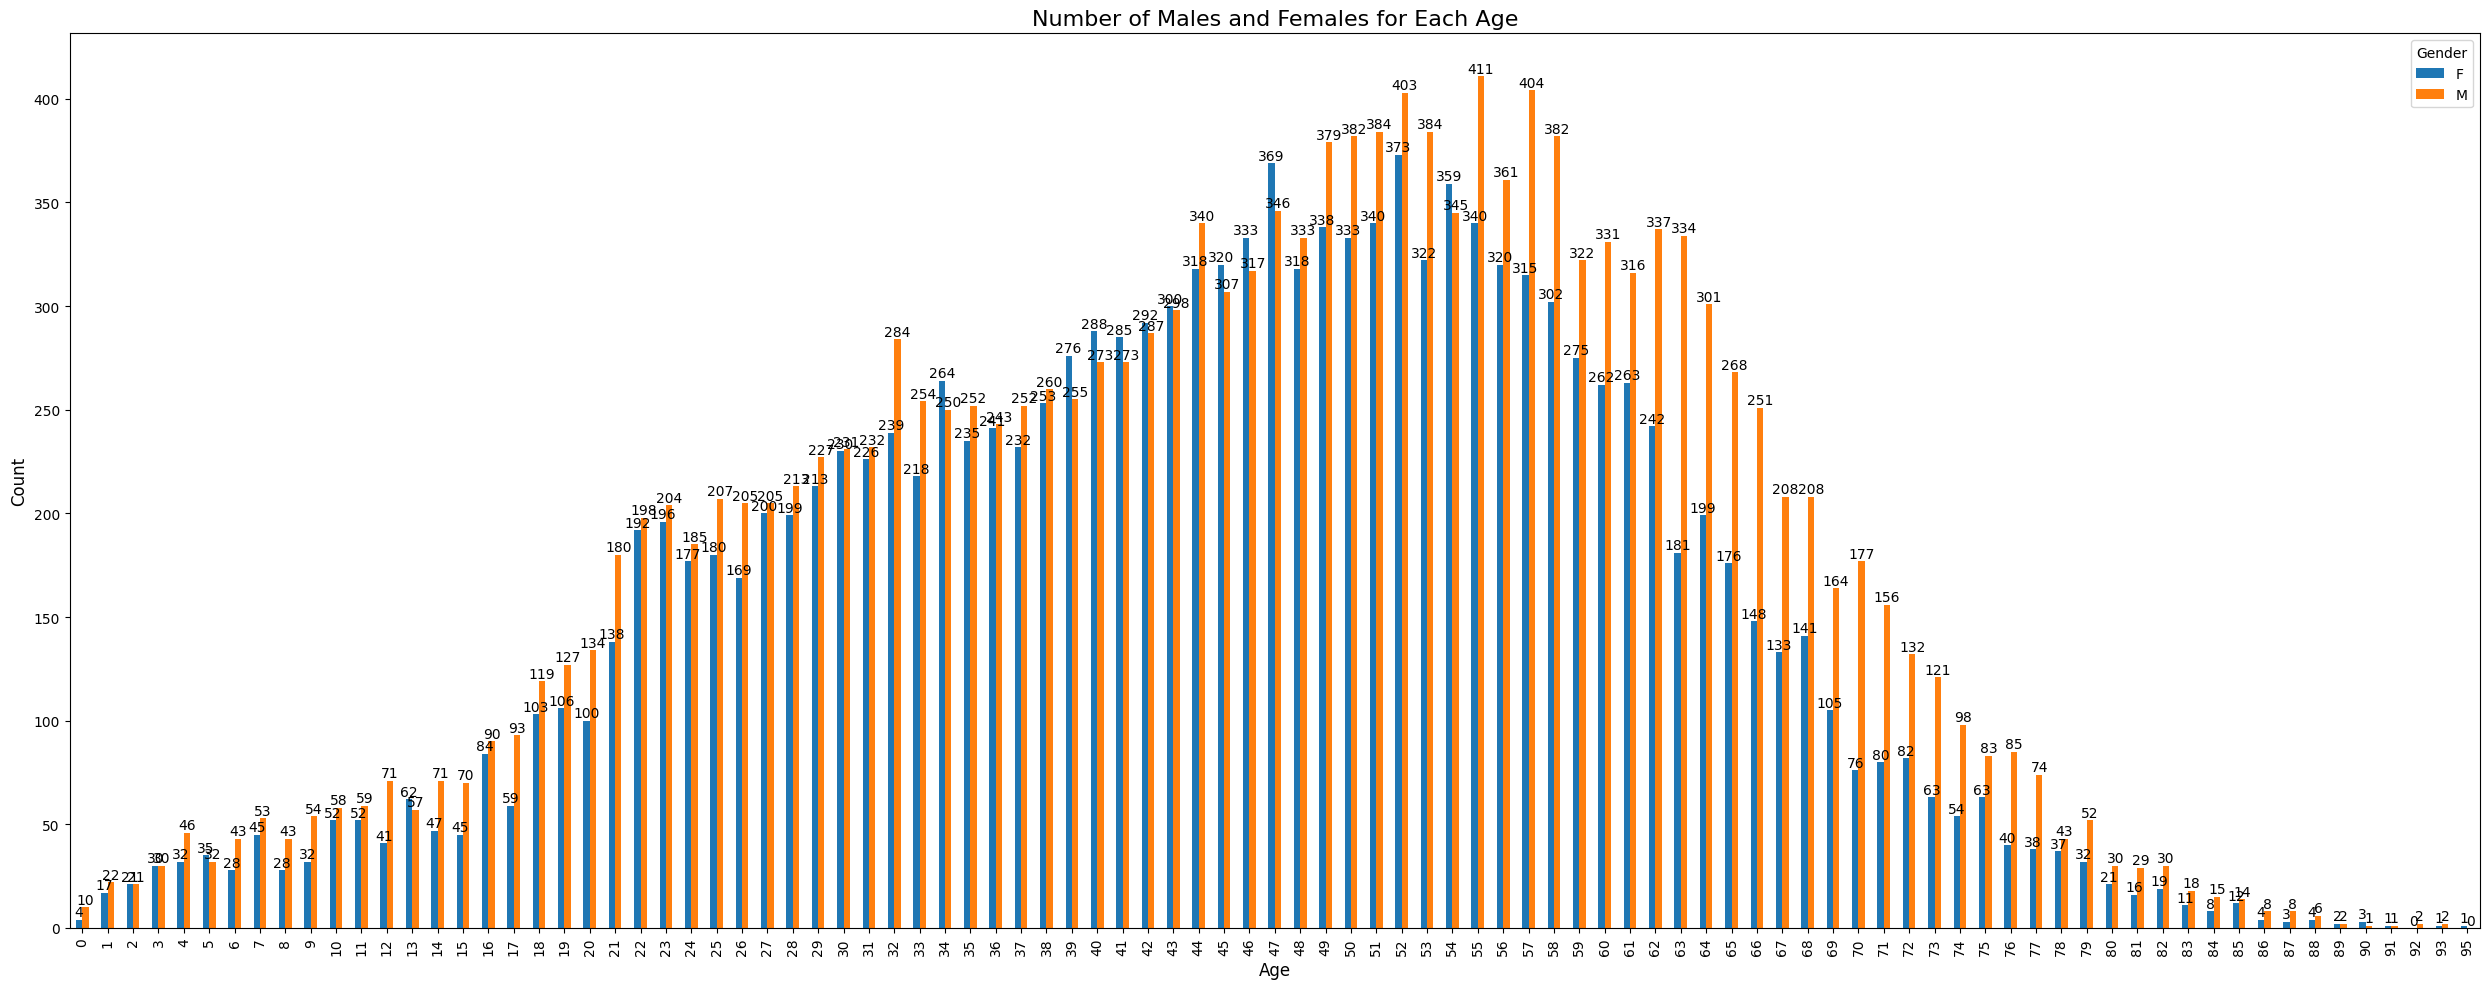

In [ ]:
age_gender_counts = unique_patients.groupby(['Patient Age', 'Patient Gender']).size().unstack(fill_value=0)

ax = age_gender_counts.plot(kind='bar', figsize=(25, 10), stacked=False)

plt.title('Number of Males and Females for Each Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.2, str(round(height)), 
            ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()

In [ ]:
most_patient_age_by_gender = unique_patients.groupby(['Patient Gender', 'Patient Age']).size().reset_index(name='Count')
most_common_age_by_gender = most_patient_age_by_gender.loc[most_patient_age_by_gender.groupby('Patient Gender')['Count'].idxmax()]
most_common_age_by_gender

,Patient Gender,Patient Age,Count
52,F,52,373
149,M,55,411


_Most female patients who come for chest condition X-rays are aged 52, while the majority of male patients are aged 55_

#### Position used to capture the xray For Each Age

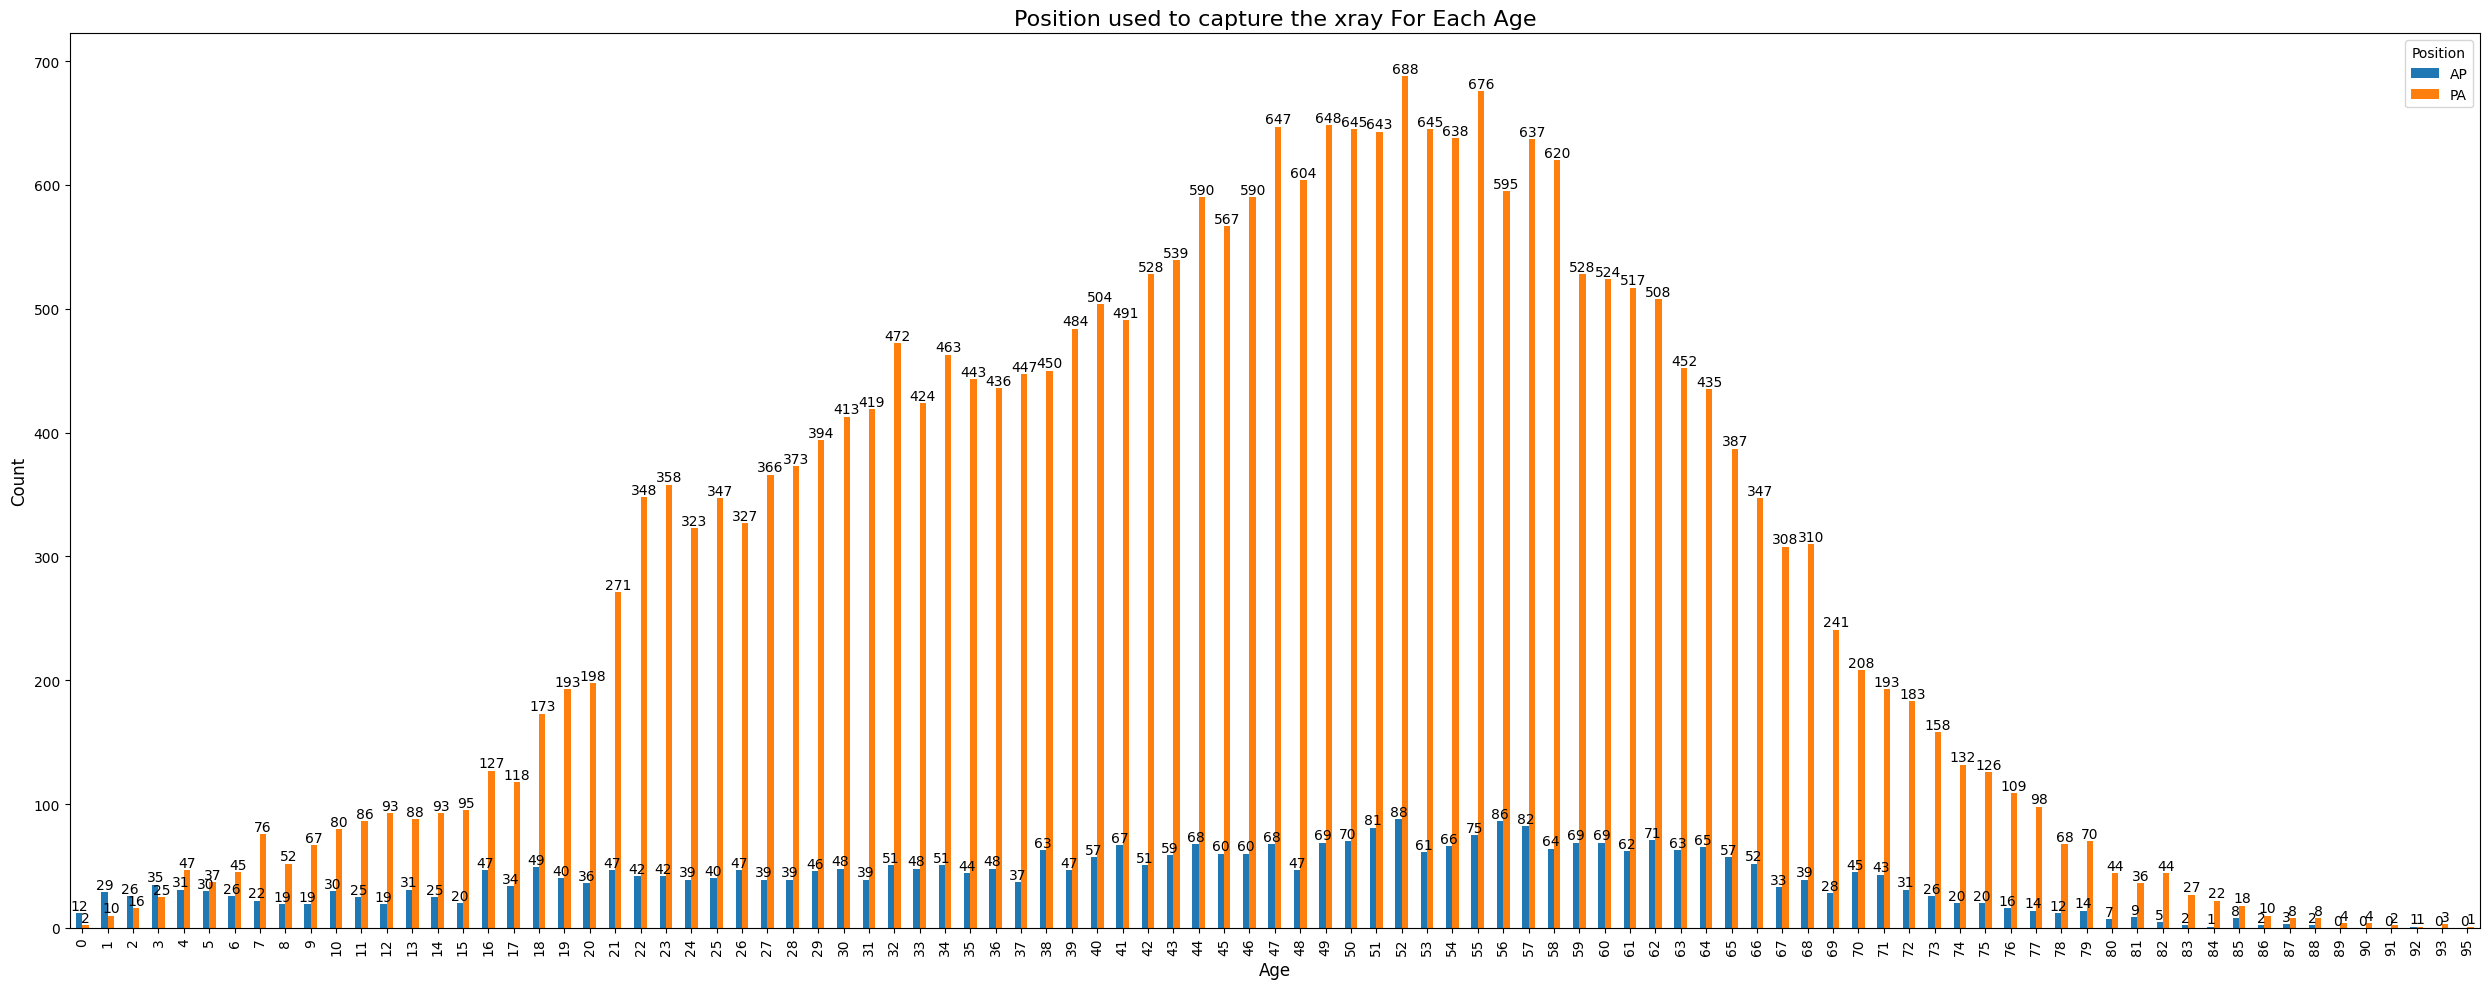

In [ ]:
age_viewPosition_counts = unique_patients.groupby(['Patient Age', 'View Position']).size().unstack(fill_value=0)

ay = age_viewPosition_counts.plot(kind='bar', figsize=(25, 10), stacked=False)

plt.title('Position used to capture the xray For Each Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Position')

for p in ay.patches:
    height = p.get_height()
    ay.text(p.get_x() + p.get_width() / 2, height + 0.2, str(round(height)), 
            ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()

In [ ]:
most_viewPlace_by_age = unique_patients.groupby(['Patient Age', 'View Position']).size().reset_index(name='Count')
most_common_viewplace_by_age = most_viewPlace_by_age.loc[most_viewPlace_by_age.groupby('View Position')['Count'].idxmax()]
most_common_viewplace_by_age

,Patient Age,View Position,Count
104,52,AP,88
105,52,PA,688


_For patients aged 52, the majority of them had their chest X-ray performed with the PA (Posteroanterior) view (688 patients), which is more common for chest X-rays. A smaller number of patients (88) had the AP (Anteroposterior) view._

In [ ]:
filtered_df = unique_patients[unique_patients['Patient Age'] == 52]
gender_counts = filtered_df['Patient Gender'].value_counts()
gender_counts

M    403
F    373
Name: Patient Gender, dtype: int64

#### Patient Condtions Breakdown

In [ ]:
all_type_of_findings = df["Finding Labels"].str.split("|").explode()
all_type_of_findings

0          Atelectasis
0             Effusion
0                 Mass
1          Atelectasis
1         Infiltration
              ...     
111005       Pneumonia
111006      No Finding
111007      No Finding
111008      No Finding
111009      No Finding
Name: Finding Labels, Length: 140077, dtype: object

In [ ]:
conditions_count = all_type_of_findings.value_counts()
conditions_count

No Finding            59932
Infiltration          19707
Effusion              13127
Atelectasis           11456
Nodule                 6290
Mass                   5741
Pneumothorax           5254
Consolidation          4619
Pleural_Thickening     3347
Cardiomegaly           2679
Emphysema              2474
Edema                  2270
Fibrosis               1647
Pneumonia              1418
Hernia                  116
Name: Finding Labels, dtype: int64

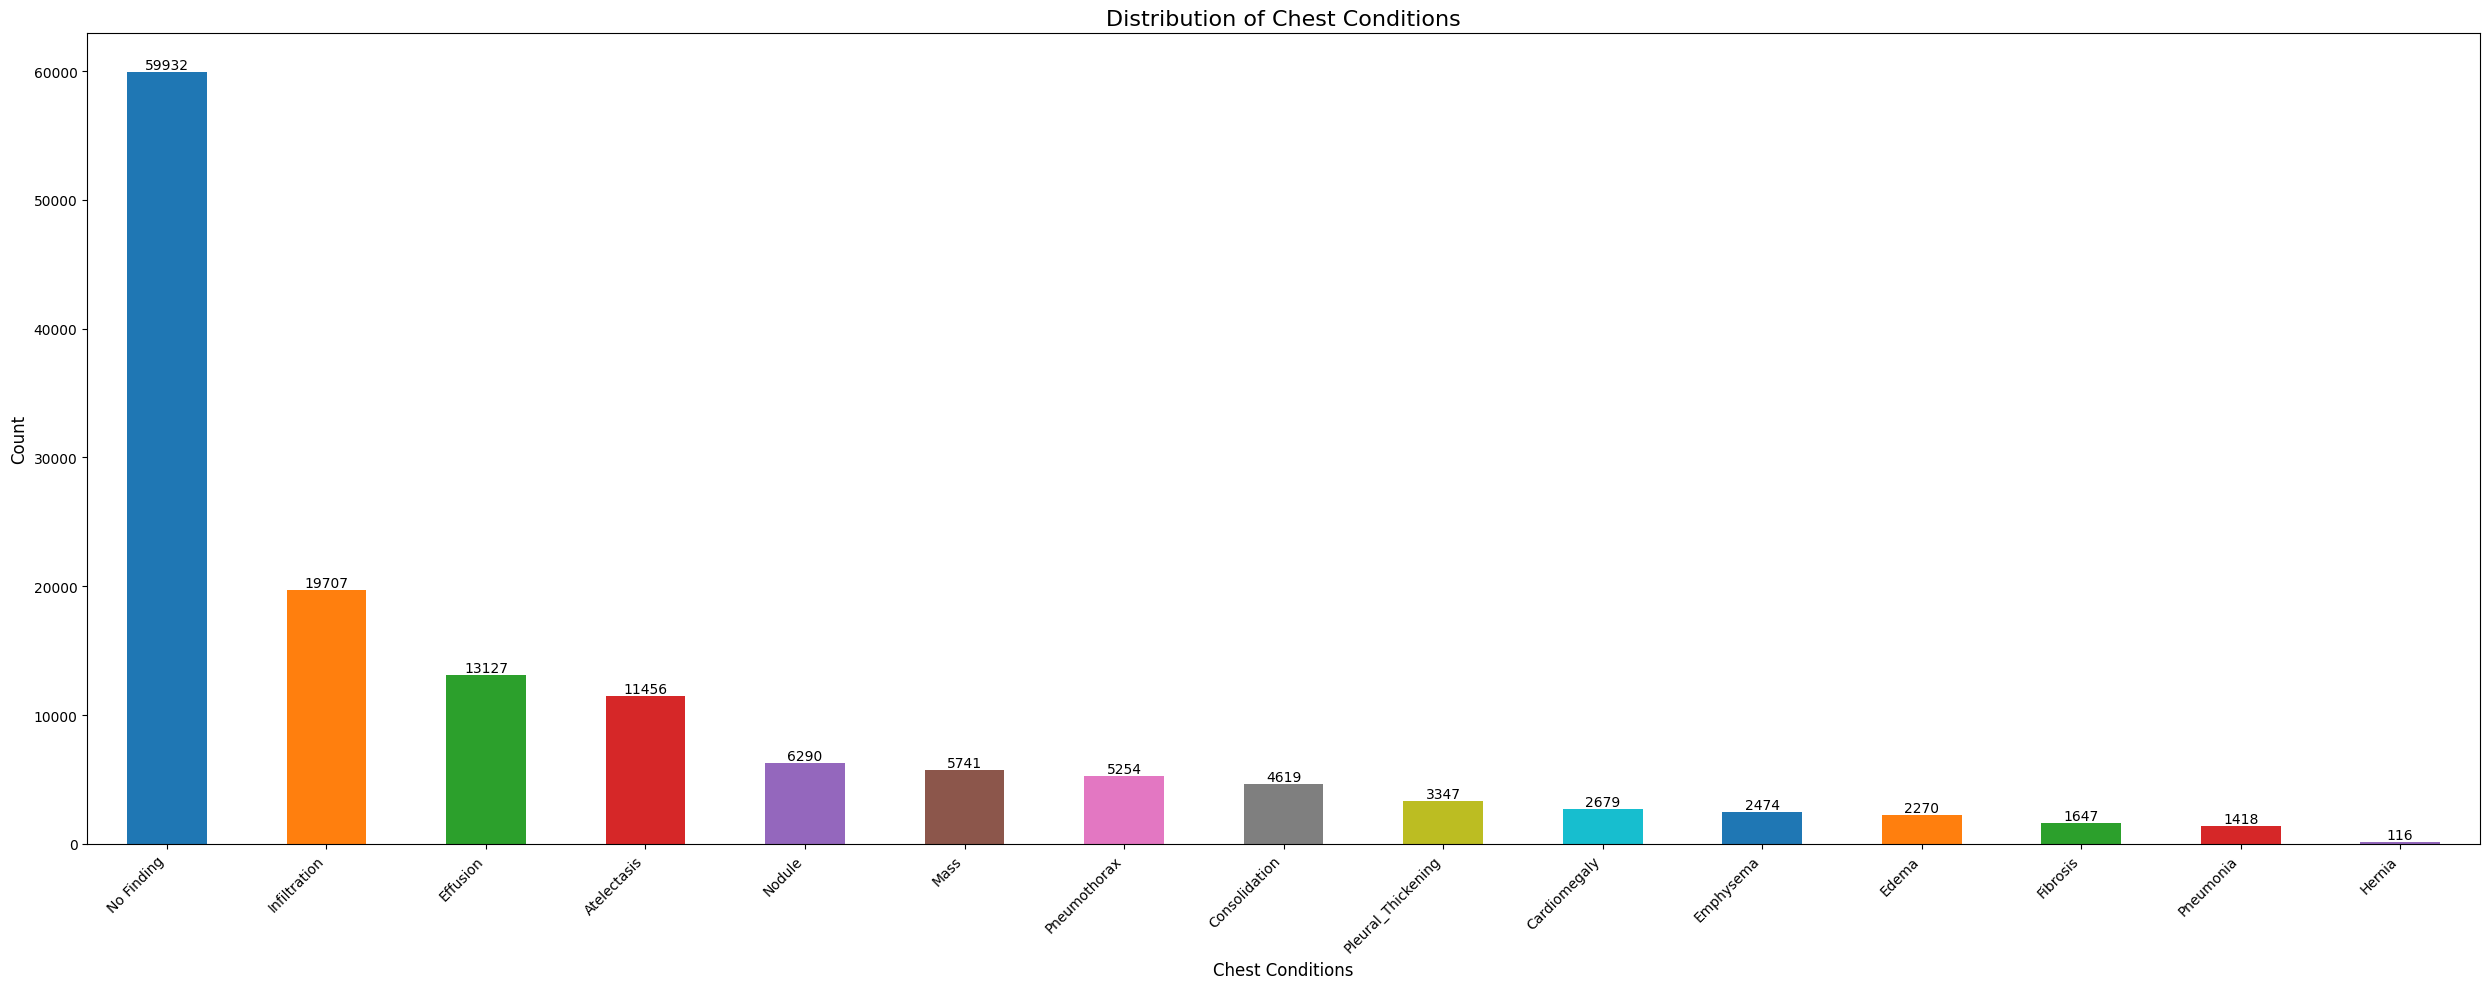

In [ ]:
plt.figure(figsize=(25,10))
az = conditions_count.plot(kind='bar', color=plt.cm.tab10.colors)
plt.xlabel('Chest Conditions', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Chest Conditions', fontsize=16)
plt.xticks(rotation=45, ha='right')

for p in az.patches:
    height = p.get_height()
    az.text(
        p.get_x() + p.get_width() / 2, 
        height + 0.2, 
        str(int(height)),
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
plt.tight_layout()
plt.show()

Patients condtions with Gender and Age

In [18]:
filtered_findings = all_type_of_findings[all_type_of_findings != "No Finding"]

In [19]:
result_df = df.loc[df.index.repeat(df["Finding Labels"].str.count("\|") + 1)]

In [20]:
result_df["Finding Labels"] = filtered_findings.reset_index(drop=True)
result_df = result_df.dropna(subset=["Finding Labels"])
final_table = result_df[["Finding Labels", "Patient Age", "Patient Gender"]]

In [ ]:
final_table

,Finding Labels,Patient Age,Patient Gender
0,Atelectasis,87,M
0,Atelectasis,87,M
0,Atelectasis,87,M
1,Effusion,87,M
1,Effusion,87,M
...,...,...,...
80140,Mass,57,M
80141,Nodule,57,M
80142,Pleural_Thickening,57,M
80143,Mass,57,M


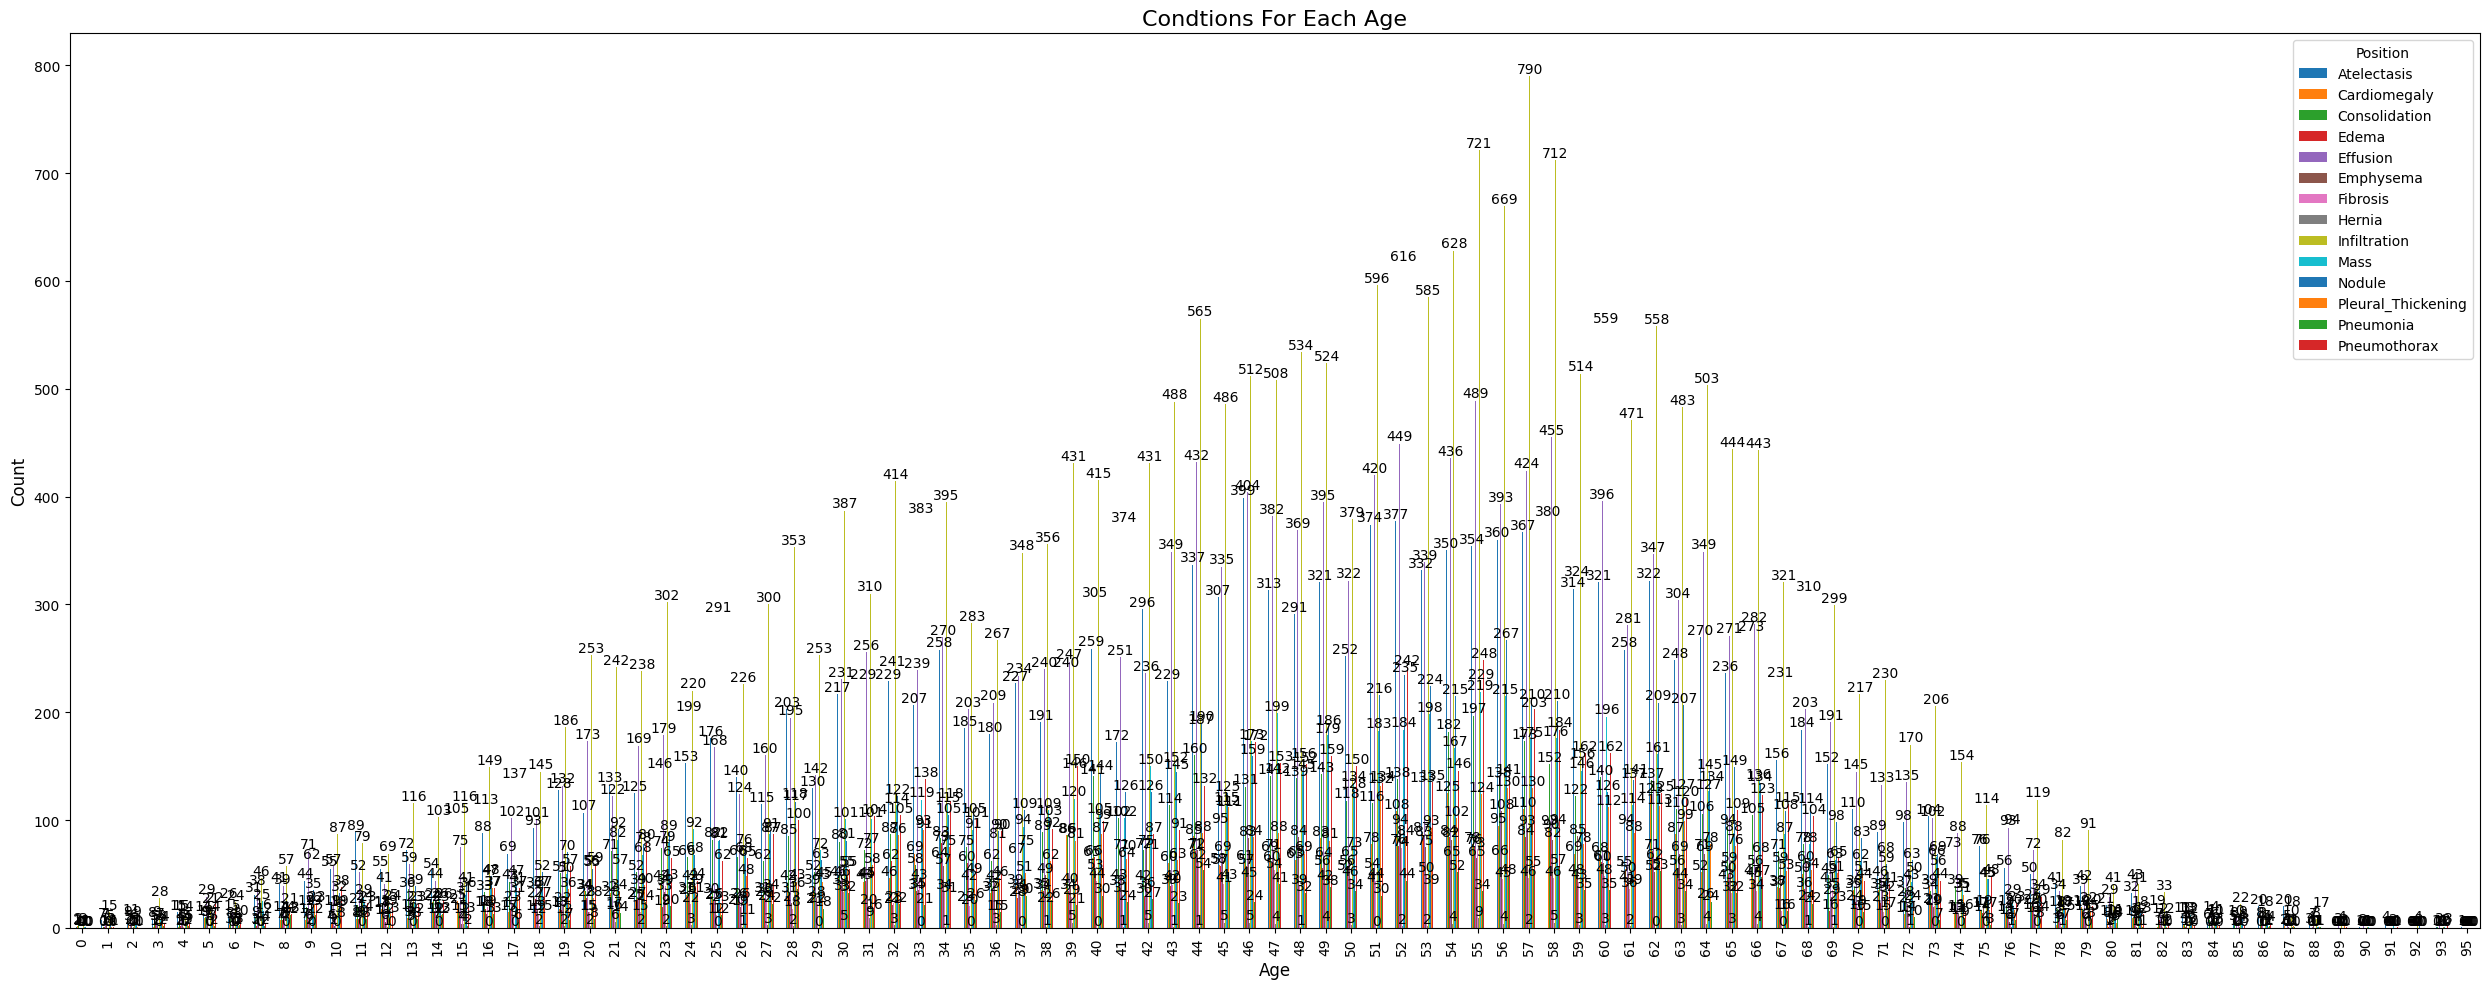

In [ ]:
age_condtions_counts = final_table.groupby(['Patient Age', 'Finding Labels']).size().unstack(fill_value=0)

ay = age_condtions_counts.plot(kind='bar', figsize=(25, 10), stacked=False)

plt.title('Condtions For Each Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Position')

for p in ay.patches:
    height = p.get_height()
    ay.text(p.get_x() + p.get_width() / 2, height + 0.2, str(round(height)), 
            ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()
plt.show()

In [ ]:
grouped = result_df.groupby(["Patient Gender", "Patient Age", "Finding Labels"]).size().reset_index(name="Count")
grouped

,Patient Gender,Patient Age,Finding Labels,Count
0,F,0,Cardiomegaly,1
1,F,0,Consolidation,1
2,F,1,Atelectasis,2
3,F,1,Consolidation,1
4,F,1,Effusion,4
...,...,...,...,...
2254,M,93,Consolidation,1
2255,M,93,Effusion,3
2256,M,93,Infiltration,1
2257,M,93,Mass,1


In [24]:
pivot_table = grouped.pivot_table(
    index="Finding Labels", 
    columns=["Patient Age", "Patient Gender"], 
    values="Count", 
    fill_value=0
)

pivot_table.columns = [f"{age} ({gender})" for age, gender in pivot_table.columns]

In [ ]:
final_condtions_table = pivot_table.reset_index()
final_condtions_table

,Finding Labels,0 (F),0 (M),1 (F),1 (M),2 (F),2 (M),3 (F),3 (M),4 (F),...,88 (M),89 (F),89 (M),90 (F),90 (M),91 (M),92 (M),93 (F),93 (M),95 (F)
0,Atelectasis,0,1,2,5,6,3,3,5,3,...,3,0,0,0,1,4,0,0,1,1
1,Cardiomegaly,1,1,0,0,3,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Consolidation,1,2,1,0,1,1,1,4,1,...,2,0,0,0,0,0,0,0,1,0
3,Edema,0,0,0,1,0,0,3,2,1,...,0,0,0,0,0,0,0,0,0,0
4,Effusion,0,0,4,3,6,5,2,7,9,...,1,2,1,0,2,0,0,0,3,0
5,Emphysema,0,0,1,2,1,1,0,2,4,...,7,0,0,0,0,0,0,0,0,0
6,Fibrosis,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,Hernia,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Infiltration,0,3,5,10,4,2,16,12,4,...,5,3,1,1,0,0,4,0,1,0
9,Mass,0,1,1,4,2,1,5,2,3,...,1,0,0,1,0,2,0,0,1,0


In [26]:
grouped_by_Condtions = grouped.groupby(["Finding Labels", "Patient Age"])["Count"].sum().reset_index()

In [ ]:
most_patients_per_condition = grouped_by_Condtions.loc[grouped_by_Condtions.groupby("Finding Labels")["Count"].idxmax()]
most_patients_per_condition

,Finding Labels,Patient Age,Count
46,Atelectasis,46,399
146,Cardiomegaly,54,125
233,Consolidation,55,197
322,Edema,58,90
403,Effusion,55,489
495,Emphysema,56,108
571,Fibrosis,52,74
618,Hernia,31,9
712,Infiltration,57,790
803,Mass,55,219


Sort by 'Count' in ascending order

In [ ]:
sorted_most_patients_by_count = most_patients_per_condition.sort_values(by="Count", ascending=True)
sorted_most_patients_by_count

,Finding Labels,Patient Age,Count
618,Hernia,31,9
1074,Pneumonia,58,57
571,Fibrosis,52,74
322,Edema,58,90
495,Emphysema,56,108
146,Cardiomegaly,54,125
980,Pleural_Thickening,51,132
233,Consolidation,55,197
803,Mass,55,219
1155,Pneumothorax,55,248


_The highest patient count comes from the 57 age group, with 790 patients diagnosed with Infiltration._

Sort by 'Patient Age' in ascending order

In [ ]:
sorted_most_patients_by_age = most_patients_per_condition.sort_values(by="Patient Age", ascending=True)
sorted_most_patients_by_age

,Finding Labels,Patient Age,Count
618,Hernia,31,9
46,Atelectasis,46,399
980,Pleural_Thickening,51,132
571,Fibrosis,52,74
146,Cardiomegaly,54,125
233,Consolidation,55,197
403,Effusion,55,489
803,Mass,55,219
1155,Pneumothorax,55,248
495,Emphysema,56,108


_Most patients in the 55 age bracket are diagnosed with conditions such as Consolidation, Effusion, Mass, and Pneumothorax_

#### Condtion breakdown for age 55

In [30]:
df_age_55 = grouped[grouped["Patient Age"]==55]

In [ ]:
grouped_55 = df_age_55.groupby(["Finding Labels", "Patient Gender"])["Count"].sum().reset_index()
pivot_table_55 = grouped_55.pivot_table(
    index="Finding Labels", 
    columns="Patient Gender", 
    values="Count", 
    fill_value=0
)
pivot_table_55.columns = ["F", "M"]
pivot_table_55["Total"] = pivot_table_55["F"] + pivot_table_55["M"]
pivot_table_55

,F,M,Total
Finding Labels,,,
Atelectasis,174,180,354
Cardiomegaly,42,36,78
Consolidation,79,118,197
Edema,26,50,76
Effusion,185,304,489
Emphysema,28,37,65
Fibrosis,34,39,73
Hernia,3,6,9
Infiltration,286,435,721


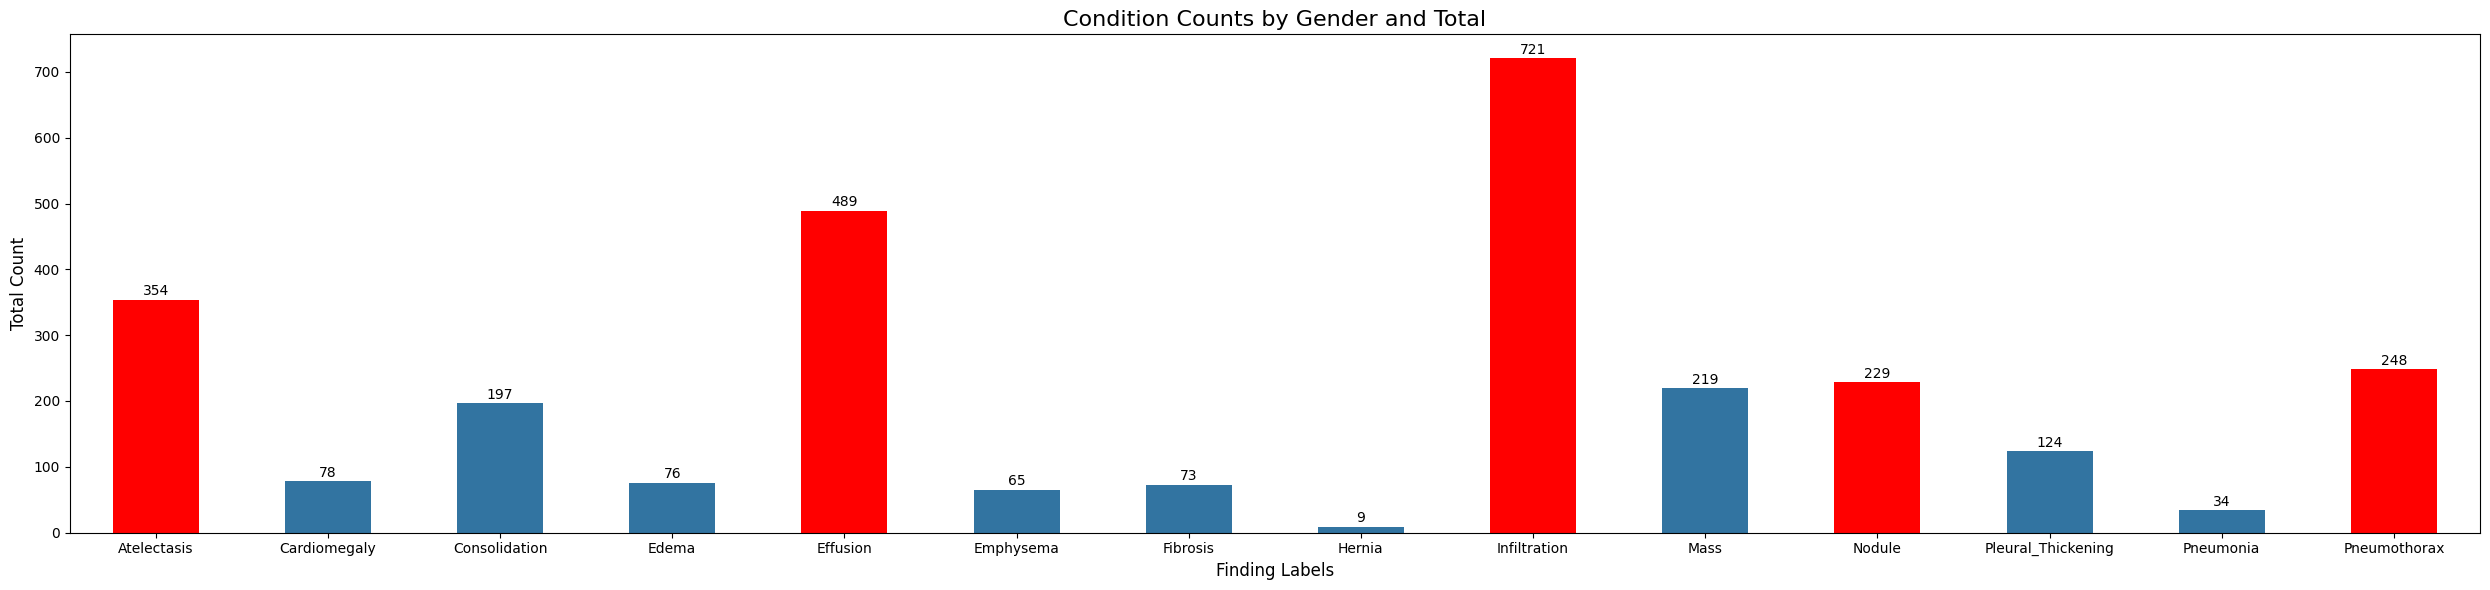

In [ ]:
top_5_totals = pivot_table_55.nlargest(5, 'Total')
plt.figure(figsize=(25, 6))
bars = sb.barplot(data=pivot_table_55, x=pivot_table_55.index, y="Total", width=0.5)

for i, bar in enumerate(bars.patches):
    if pivot_table_55["Total"].iloc[i] in top_5_totals["Total"].values:
        bar.set_facecolor('red')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{int(height)}', ha="center", va="bottom", fontsize=10)

plt.title('Condition Counts by Gender and Total', fontsize=16)
plt.xlabel('Finding Labels', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

_Although conditions such as Consolidation, Effusion, Mass, and Pneumothorax account for the majority of patients in the overall dataset, for the 55 age group, the most prevalent conditions are Atelectasis, Effusion, Infiltration, Nodule, and Pneumothorax._

X_Ray Image Position Idetification Using Modal Training

In [34]:
ap_images = df[df["View Position"]=="AP"]
pa_images = df[df["View Position"]=="PA"]

In [38]:
image_source = "./xray_images"
ap_folder = "ap_images"
pa_folder = "pa_images"

In [40]:
os.makedirs(ap_folder, exist_ok=True)
os.makedirs(pa_folder, exist_ok=True)

In [ ]:
for index, row in df.iterrows():
    image_file = row["Image Index"]
    view_position = row["View Position"]
    
    source_path = os.path.join(image_source, image_file)
    destination_path = ap_folder if view_position == "AP" else pa_folder

    if os.path.exists(source_path):
        shutil.move(source_path, os.path.join(destination_path, image_file))
        print(f"Moved {image_file} to {destination_path}")
    else:
        print(f"Image file {image_file} not found in {image_source}")

print("Sorting completed!")

In [45]:
ap_image_count = len([f for f in os.listdir(ap_folder) if os.path.isfile(os.path.join(ap_folder, f))])
pa_image_count = len([f for f in os.listdir(pa_folder) if os.path.isfile(os.path.join(pa_folder, f))])
print(f"Total images in {ap_folder}: {ap_image_count}")
print(f"Total images in {pa_folder}: {pa_image_count}")

Total images in ap_images: 1299
Total images in pa_images: 2382


In [ ]:
ap_images_list = set(os.listdir(ap_folder))
filtered_ap_images = ap_images[ap_images["Image Index"].isin(ap_images_list)]
filtered_ap_images

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
30,00000250_006.png,No Finding,250,49,M,AP
31,00000250_007.png,Infiltration,250,49,M,AP
32,00000250_008.png,Effusion,250,49,M,AP
33,00000250_009.png,No Finding,250,49,M,AP
36,00000250_012.png,No Finding,250,50,M,AP
...,...,...,...,...,...,...
3963,00001330_004.png,Effusion,1330,75,M,AP
3965,00001332_000.png,Consolidation|Nodule,1332,13,M,AP
3966,00001332_001.png,No Finding,1332,13,M,AP
3967,00001332_002.png,Consolidation|Infiltration,1332,16,M,AP


In [50]:
pa_images_list = set(os.listdir(pa_folder))
filtered_pa_images = pa_images[pa_images["Image Index"].isin(pa_images_list)]
filtered_pa_images

,Image Index,Finding Labels,Patient ID,Patient Age,Patient Gender,View Position
34,00000250_010.png,Consolidation|Effusion,250,49,M,PA
35,00000250_011.png,No Finding,250,49,M,PA
38,00000250_014.png,Infiltration|Mass,250,52,M,PA
39,00000250_015.png,Mass,250,52,M,PA
40,00000250_016.png,Atelectasis|Infiltration|Mass,250,52,M,PA
...,...,...,...,...,...,...
3977,00001335_002.png,No Finding,1335,18,F,PA
3978,00001335_003.png,No Finding,1335,19,F,PA
3979,00001335_004.png,No Finding,1335,19,F,PA
3980,00001335_005.png,No Finding,1335,22,F,PA


In [53]:
folders = [ap_folder, pa_folder]
output_folders = ["train","validation","test"]

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [54]:
assert train_ratio + val_ratio + test_ratio == 1.0

In [60]:
for folder in folders:
    images = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
    
    # Split the data
    train_files, temp_files = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=test_ratio/(test_ratio + val_ratio), random_state=42)
    
    # Create train, validation, and test folders within each image folder
    for split, split_files in zip(output_folders, [train_files, val_files, test_files]):
        split_folder = os.path.join(folder, split)
        os.makedirs(split_folder, exist_ok=True)
        
        # Move files into the respective folder
        for file_name in split_files:
            shutil.move(os.path.join(folder, file_name), os.path.join(split_folder, file_name))

##### Modal Training

In [6]:
import tensorflow as tf


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\pasin\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\pasin\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\pasin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\pasin\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\pasin\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\pasin\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_lo

AttributeError: _ARRAY_API not found

In [7]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
